<a href="https://colab.research.google.com/github/clumsycoder42525/Movie_genre_classification/blob/main/Movies_Genres_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')

In [ ]:
df.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [ ]:
df.isnull().sum()

,0
Movie_Title,0
Year,0
Director,0
Actors,0
Rating,0
Runtime(Mins),0
Censor,0
Total_Gross,0
main_genre,0
side_genre,0


In [ ]:
df["main_genre"].unique()

array(['Action', 'Animation', 'Biography', 'Adventure', 'Western',
       'Drama', 'Crime', 'Comedy', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Musical'], dtype=object)

In [ ]:
X_dense = X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_dense)
    wcss.append(kmeans.inertia_)


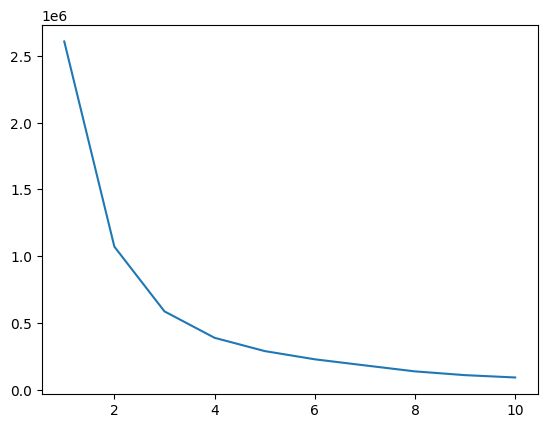

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Total_Gross'] = imputer.fit_transform(df[['Total_Gross']])
X = df[["Rating", "Runtime(Mins)", "Total_Gross", "main_genre"]]
ohe = OneHotEncoder()
ct = make_column_transformer(
    (ohe, ["main_genre"]),
    remainder='passthrough'
)

ct.fit_transform(X)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 22248 stored elements and shape (5562, 16)>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)
X_scaled = ss.fit_transform(X_transformed)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

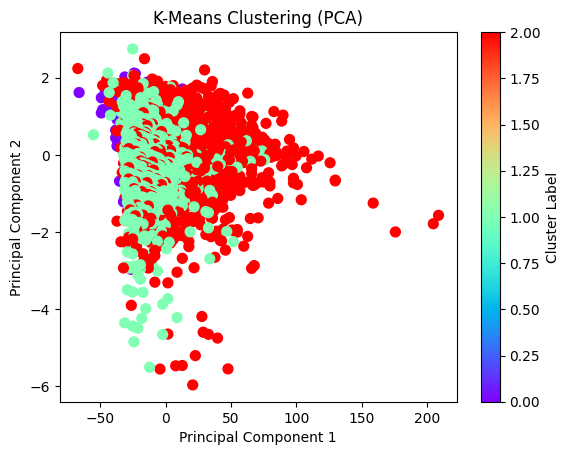

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA)')
plt.colorbar(label='Cluster Label')
plt.show()

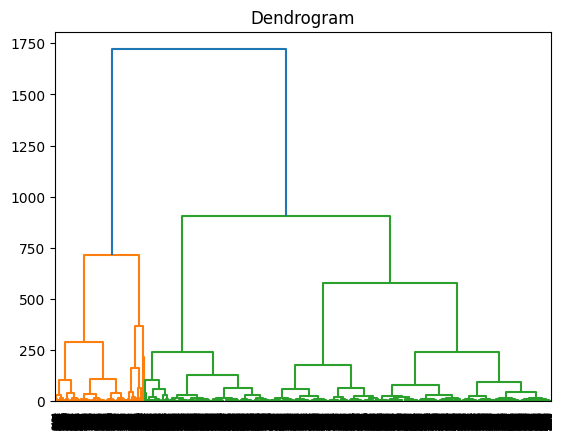

In [ ]:
import scipy.cluster.hierarchy as sc
plt.title("Dendrogram")
sc.dendrogram(sc.linkage(X_pca,method="ward"))
plt.title("Dendrogram")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)

DBSCAN()

In [ ]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

Text(0, 0.5, 'Principal Component 2')

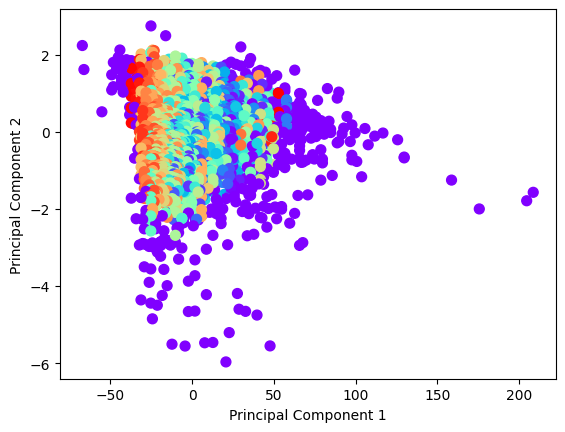

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='rainbow', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')